In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone2
['.git', '.gitignore', '.ipynb_checkpoints', '42343_72434_bundle_archive', '42343_72434_bundle_archive.zip', 'Initial EDA.ipynb', 'LICENSE', 'README.md', 'WA_Fn-UseC_-Telco-Customer-Churn.xlsx']


<IPython.core.display.Javascript object>

In [3]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

# Initial EDA

In [4]:
pd.set_option("display.max_columns", None)
churn = pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<IPython.core.display.Javascript object>

In [5]:
churn = pd.get_dummies(churn, columns=["Churn"], drop_first=True)

<IPython.core.display.Javascript object>

In [6]:
churn = churn.drop(columns=["customerID"])

<IPython.core.display.Javascript object>

In [7]:
churn.shape

(7043, 20)

<IPython.core.display.Javascript object>

In [8]:
# No missing data
churn.isna().mean()

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn_Yes           0.0
dtype: float64

<IPython.core.display.Javascript object>

In [9]:
col = churn[0:]
for c in col:
    print("Value counts for " + c)
    print(churn[c].value_counts())

Value counts for gender
Male      3555
Female    3488
Name: gender, dtype: int64
Value counts for SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Value counts for Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Value counts for Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
Value counts for tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Value counts for PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
Value counts for MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Value counts for InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Value counts for OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: 

<IPython.core.display.Javascript object>

In [10]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn_Yes             uint8
dtype: object

<IPython.core.display.Javascript object>

In [11]:
bin_cols = [
    "SeniorCitizen",
]
cat_cols = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
drop_cats = [
    "Male",
    0,
    "No",
    "No",
    "Yes",
    "No",
    "Fiber optic",
    "No",
    "No",
    "No",
    "No",
    "No",
    "No",
    "Month-to-month",
    "Yes",
    "Electronic check",
]
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

<IPython.core.display.Javascript object>

In [12]:
churn["TotalCharges"] = churn["TotalCharges"].replace(" ", np.nan, regex=True)

<IPython.core.display.Javascript object>

In [13]:
churn["TotalCharges"].loc[488]

nan

<IPython.core.display.Javascript object>

In [14]:
pd.to_numeric(churn["TotalCharges"])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

<IPython.core.display.Javascript object>

In [15]:
churn[num_cols].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

<IPython.core.display.Javascript object>

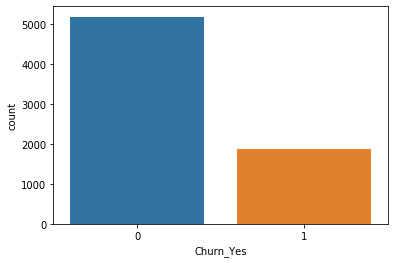

<IPython.core.display.Javascript object>

In [16]:
sns.countplot(churn["Churn_Yes"])
plt.show()

,Churn_Yes
SeniorCitizen,
0,0.236062
1,0.416813


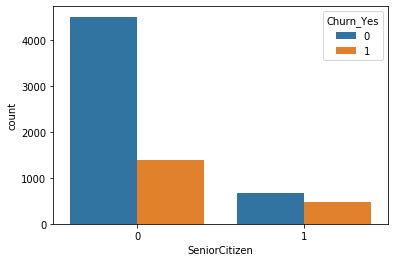

<IPython.core.display.Javascript object>

In [17]:
for col in bin_cols:
    perc_churn = churn[["Churn_Yes", col]].groupby(col).mean()
    display(perc_churn)

    sns.countplot(hue="Churn_Yes", x=col, data=churn)
    plt.show()

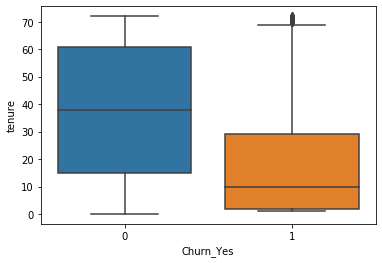

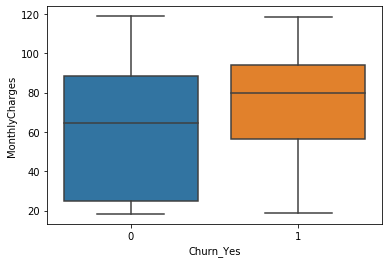

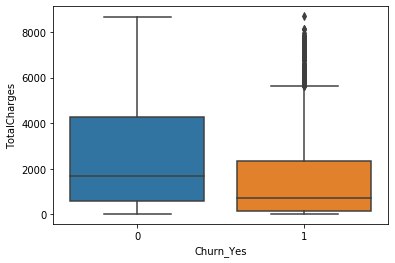

<IPython.core.display.Javascript object>

In [18]:
for col in num_cols:
    sns.boxplot("Churn_Yes", col, data=churn)
    plt.show()

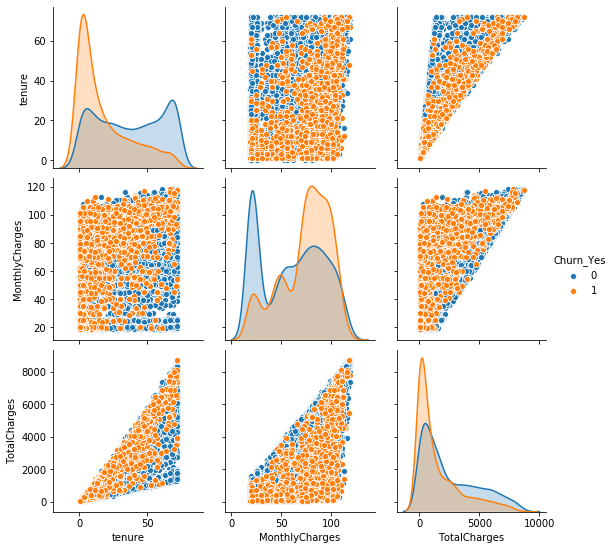

<IPython.core.display.Javascript object>

In [19]:
sns.pairplot(churn[num_cols + ["Churn_Yes"]], hue="Churn_Yes")
plt.show()

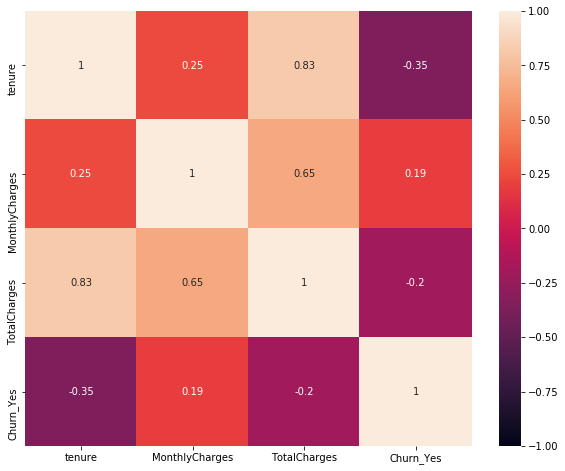

<IPython.core.display.Javascript object>

In [20]:
# Total Charges seems to be correlated with most of the num_cols
plt.figure(figsize=(10, 8))
sns.heatmap(churn[num_cols + ["Churn_Yes"]].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [21]:
churn = churn.drop(columns=["TotalCharges"])

<IPython.core.display.Javascript object>

In [22]:
pd.get_dummies(
    churn,
    columns=[
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
    drop_first=True,
)

,SeniorCitizen,tenure,MonthlyCharges,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


<IPython.core.display.Javascript object>

In [23]:
bin_cols = churn.drop(columns=["tenure", "MonthlyCharges"])

<IPython.core.display.Javascript object>

,Churn_Yes
gender,
Female,0.269209
Male,0.261603


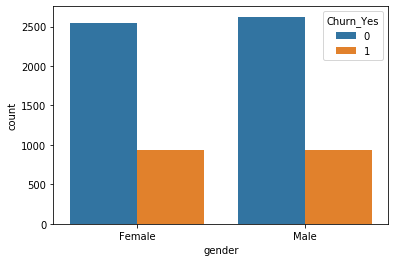

,Churn_Yes
SeniorCitizen,
0,0.236062
1,0.416813


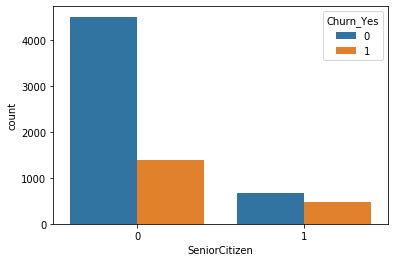

,Churn_Yes
Partner,
No,0.329580
Yes,0.196649


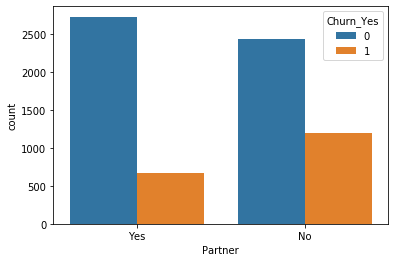

,Churn_Yes
Dependents,
No,0.312791
Yes,0.154502


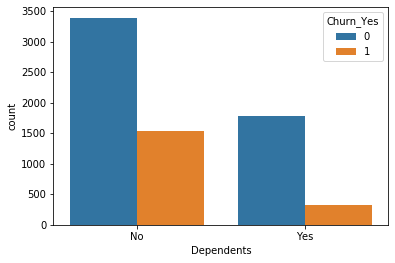

,Churn_Yes
PhoneService,
No,0.249267
Yes,0.267096


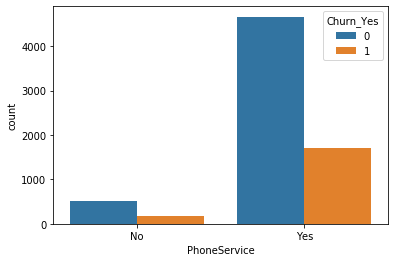

,Churn_Yes
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


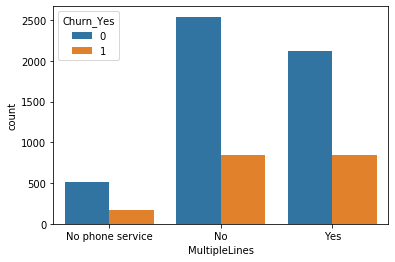

,Churn_Yes
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


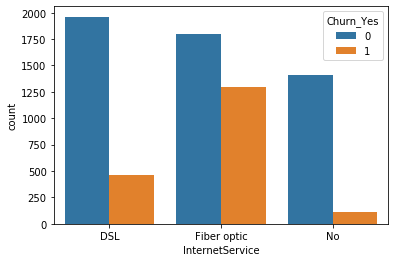

,Churn_Yes
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


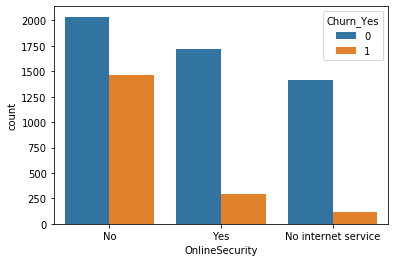

,Churn_Yes
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


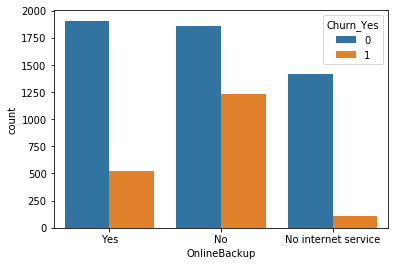

,Churn_Yes
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


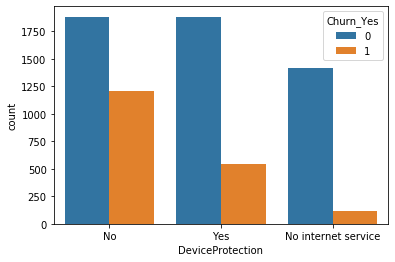

,Churn_Yes
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


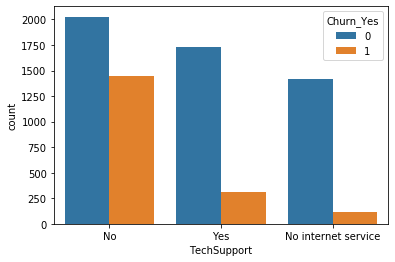

,Churn_Yes
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


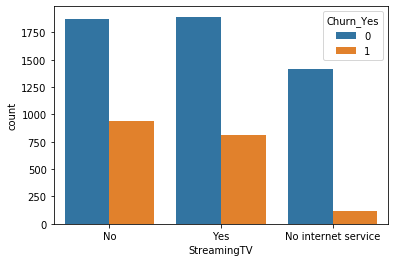

,Churn_Yes
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


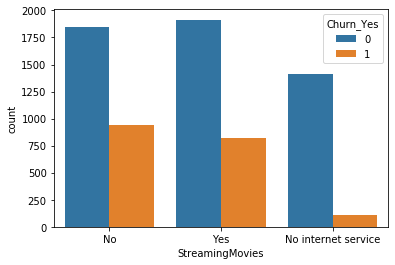

,Churn_Yes
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


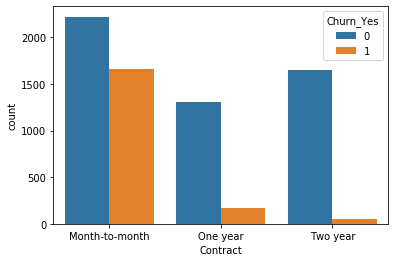

,Churn_Yes
PaperlessBilling,
No,0.163301
Yes,0.335651


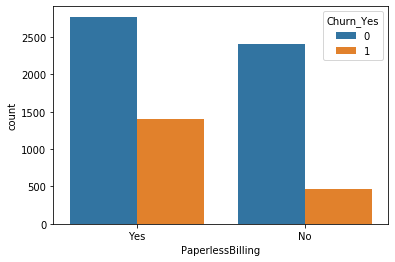

,Churn_Yes
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


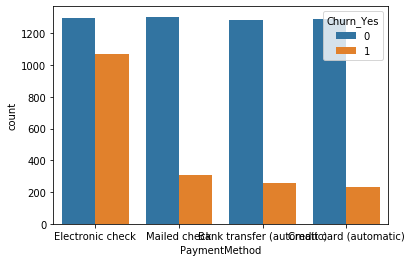

ValueError: Grouper for 'Churn_Yes' not 1-dimensional

<IPython.core.display.Javascript object>

In [24]:
# Getting error but not too sure what the error means
for col in bin_cols:
    perc_churn = churn[["Churn_Yes", col]].groupby(col).mean()
    display(perc_churn)

    sns.countplot(hue="Churn_Yes", x=col, data=churn)
    plt.show()

In [25]:
X = churn.drop(columns=["Churn_Yes"])

<IPython.core.display.Javascript object>

In [26]:
# Unsure what this error means.
print_vif(X)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<IPython.core.display.Javascript object>